In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import matplotlib.pyplot as plt
import pandas as pd

## With Embeddings

In [ ]:
!wget "https://github.com/HAadams/fake_news_dataset/blob/master/bart_doc_embeddings.zip?raw=true" -O bart_doc_embeddings.zip
!unzip bart_doc_embeddings.zip

--2020-11-16 07:52:39--  https://github.com/HAadams/fake_news_dataset/blob/master/bart_doc_embeddings.zip?raw=true
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/HAadams/fake_news_dataset/raw/master/bart_doc_embeddings.zip [following]
--2020-11-16 07:52:39--  https://github.com/HAadams/fake_news_dataset/raw/master/bart_doc_embeddings.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/HAadams/fake_news_dataset/master/bart_doc_embeddings.zip [following]
--2020-11-16 07:52:39--  https://media.githubusercontent.com/media/HAadams/fake_news_dataset/master/bart_doc_embeddings.zip
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (

In [ ]:
df = pd.read_pickle('bart_doc_embeddings')

In [ ]:
target = df['Target']
del df['Target']

Text(0, 0.5, 'Explained Variance %')

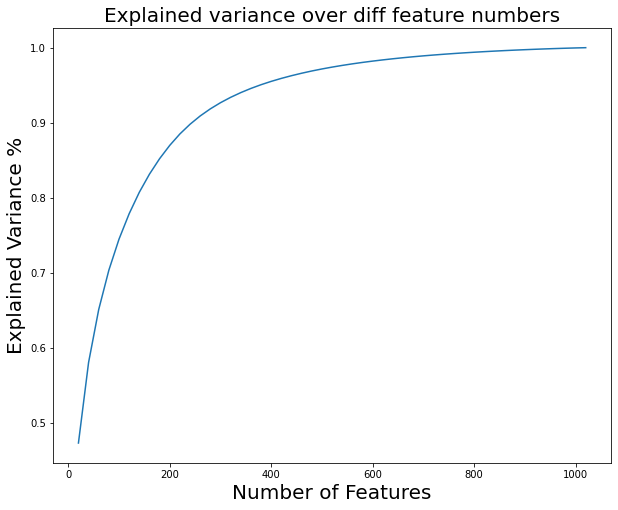

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca = pca.fit(df)
num_features = list(range(20, 1025, 20))
variance = [sum(pca.explained_variance_ratio_[:num])/sum(pca.explained_variance_ratio_) for num in num_features]
fig, ax = plt.subplots(1, figsize=(10,8))
# Plot the first 1000 components only to make the graph more readable
ret = plt.plot(num_features, variance)
ax.set_title("Explained variance over diff feature numbers", fontsize=20)
ax.set_xlabel("Number of Features", fontsize=20)
ax.set_ylabel("Explained Variance %", fontsize=20)


In [ ]:
selected_features = 500
doc_vectors = PCA(selected_features).fit_transform(df)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2)

In [ ]:
reg = LogisticRegression()
reg.fit(X_train, y_train)
reg.score(X_test, y_test)

0.9405450500556174

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
reg = LogisticRegression()
solvers = ['lbfgs', 'newton-cg', 'liblinear']
penalty = ['l1', 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers, penalty=penalty, C=c_values)
random_search = RandomizedSearchCV(estimator=reg, param_distributions=grid, scoring='accuracy')
random_result = random_search.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/line

In [ ]:
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.940599 using {'solver': 'newton-cg', 'penalty': 'l2', 'C': 10}
nan (nan) with: {'solver': 'newton-cg', 'penalty': 'l1', 'C': 0.01}
0.935440 (0.001658) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 0.01}
0.939876 (0.002031) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 0.1}
0.940488 (0.001590) with: {'solver': 'liblinear', 'penalty': 'l2', 'C': 1.0}
0.940599 (0.001598) with: {'solver': 'newton-cg', 'penalty': 'l2', 'C': 10}
nan (nan) with: {'solver': 'lbfgs', 'penalty': 'l1', 'C': 0.1}
0.940599 (0.001681) with: {'solver': 'liblinear', 'penalty': 'l1', 'C': 10}
nan (nan) with: {'solver': 'lbfgs', 'penalty': 'l1', 'C': 10}
0.940599 (0.001614) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 100}
0.940502 (0.001573) with: {'solver': 'lbfgs', 'penalty': 'l2', 'C': 1.0}


In [ ]:
y_pred = random_result.predict(X_test)

In [ ]:
wo_embed_lr_acc = random_result.score(X_test, y_test)
wo_embed_lr_prec = precision_score(y_test, y_pred, average='macro')
wo_embed_lr_recall = recall_score(y_test, y_pred, average='macro')
wo_embed_lr_acc, wo_embed_lr_prec, wo_embed_lr_recall

(0.9404338153503893, 0.9403702515366481, 0.9404010250911141)

### Random Forests 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
bootstrap=[True, False]
min_samples_split = [2,5,10,15]
max_depth = [5,10,25,30,40,50]
max_features = ['auto', 'sqrt']
n_estimators = [15, 50, 75, 100, 200]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap}
rf_grid = RandomizedSearchCV(estimator=clf, param_distributions = random_grid, random_state=42)
rf_result = rf_grid.fit(X_train, y_train)

In [ ]:
print("Best: %f using %s" % (rf_result.best_score_, rf_result.best_params_))
means = rf_result.cv_results_['mean_test_score']
stds = rf_result.cv_results_['std_test_score']
params = rf_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.925916 using {'n_estimators': 200, 'min_samples_split': 15, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
0.889555 (0.001669) with: {'n_estimators': 100, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': True}
0.925721 (0.002466) with: {'n_estimators': 200, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': False}
0.925818 (0.001706) with: {'n_estimators': 200, 'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
0.842696 (0.003633) with: {'n_estimators': 75, 'min_samples_split': 15, 'max_features': 'sqrt', 'max_depth': 5, 'bootstrap': False}
0.925916 (0.001504) with: {'n_estimators': 200, 'min_samples_split': 15, 'max_features': 'sqrt', 'max_depth': 30, 'bootstrap': False}
0.914305 (0.001669) with: {'n_estimators': 75, 'min_samples_split': 10, 'max_features': 'auto', 'max_depth': 40, 'bootstrap': True}
0.843057 (0.003704) with: {'n_estimators': 100, 'min_samples_split': 5, 

In [ ]:
y_pred = rf_result.predict(X_test)

In [ ]:
wo_embed_fr_acc = rf_result.score(X_test, y_test)
wo_embed_fr_prec = precision_score(y_test, y_pred, average='macro')
wo_embed_fr_recall = recall_score(y_test, y_pred, average='macro')
wo_embed_fr_acc, wo_embed_fr_prec, wo_embed_fr_recall

(0.9279199110122358, 0.9283087891386721, 0.9275309413616022)

### SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC(random_state=47)
param_grid = {'C':[0.1, 1],'gamma':[1, 0.1],'kernel':['linear']}
sv_grid = RandomizedSearchCV(svc, param_grid, refit=True, verbose=3)
sv_results = sv_grid.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
print("Best: %f using %s" % (sv_results.best_score_, sv_results.best_params_))
means = sv_results.cv_results_['mean_test_score']
stds = sv_results.cv_results_['std_test_score']
params = sv_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
svc.score(X_test, y_test)

0.9549499443826474

In [ ]:
wo_embed_svm_acc = sv_results.score(X_test, y_test)
wo_embed_svm_prec = precision_score(y_test, y_pred, average='macro')
wo_embed_svm_recall = recall_score(y_test, y_pred, average='macro')
wo_embed_svm_acc, wo_embed_svm_prec, wo_embed_svm_recall

## Without Embeddings

In [ ]:
!wget "https://raw.githubusercontent.com/HAadams/fake_news_dataset/master/combined_data.zip" -O combined_data.zip
!unzip combined_data.zip

--2020-11-20 02:34:51--  https://raw.githubusercontent.com/HAadams/fake_news_dataset/master/combined_data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 71497977 (68M) [application/zip]
Saving to: ‘combined_data.zip’

combined_data.zip   100%[===================>]  68.19M  86.7MB/s    in 0.8s    

2020-11-20 02:34:52 (86.7 MB/s) - ‘combined_data.zip’ saved [71497977/71497977]

Archive:  combined_data.zip
  inflating: combined_data.csv       


In [ ]:
df = pd.read_csv('combined_data.csv')

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
text = df['Text']
vectorizer = TfidfVectorizer()
tf_vector = vectorizer.fit_transform(text)

In [ ]:
text = df['Text'].tolist()
y = df['Target'].tolist()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(tf_vector, y, test_size = 0.2, shuffle=True)

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
reg = LogisticRegression()
solvers = ['lbfgs', 'newton-cg', 'liblinear']
penalty = ['l1', 'l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers, penalty=penalty, C=c_values)
random_search = RandomizedSearchCV(estimator=reg, param_distributions=grid, scoring='accuracy')
random_result = random_search.fit(X_train, y_train)

In [ ]:
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))
means = random_result.cv_results_['mean_test_score']
stds = random_result.cv_results_['std_test_score']
params = random_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
wo_embed_lr_acc = random_result.score(X_test, y_test)
wo_embed_lr_prec = precision_score(y_test, y_pred, average='macro')
wo_embed_lr_recall = recall_score(y_test, y_pred, average='macro')
wo_embed_lr_acc, wo_embed_lr_prec, wo_embed_lr_recall

### Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
bootstrap=[True, False]
min_samples_split = [2,5,10,15]
max_depth = [5,10,25,30,40,50]
max_features = ['auto', 'sqrt']
n_estimators = [15, 50, 75, 100, 200]
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'bootstrap': bootstrap}
rf_grid = RandomizedSearchCV(estimator=clf, param_distributions = random_grid, random_state=42)
rf_result = rf_grid.fit(X_train, y_train)

In [ ]:
print("Best: %f using %s" % (rf_result.best_score_, rf_result.best_params_))
means = rf_result.cv_results_['mean_test_score']
stds = rf_result.cv_results_['std_test_score']
params = rf_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
wo_embed_fr_acc = rf_result.score(X_test, y_test)
wo_embed_fr_prec = precision_score(y_test, y_pred, average='macro')
wo_embed_fr_recall = recall_score(y_test, y_pred, average='macro')
wo_embed_fr_acc, wo_embed_fr_prec, wo_embed_fr_recall

### SVM

In [ ]:
from sklearn.svm import SVC
svc = SVC(random_state=47)
param_grid = {'C':[0.1, 1],'gamma':[1, 0.1],'kernel':['linear']}
sv_grid = RandomizedSearchCV(svc, param_grid, refit=True, verbose=3)
sv_results = sv_grid.fit(X_train, y_train)

In [ ]:
print("Best: %f using %s" % (sv_results.best_score_, sv_results.best_params_))
means = sv_results.cv_results_['mean_test_score']
stds = sv_results.cv_results_['std_test_score']
params = sv_results.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
wo_embed_svm_acc = sv_results.score(X_test, y_test)
wo_embed_svm_prec = precision_score(y_test, y_pred, average='macro')
wo_embed_svm_recall = recall_score(y_test, y_pred, average='macro')
wo_embed_svm_acc, wo_embed_svm_prec, wo_embed_svm_recall